In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("model_sizes_benchmark2.csv")
razer = pd.read_csv("model_sizes_benchmark_razer.csv")

In [3]:
data

,model_size,time,wer,energy
0,tiny,11.816772,0.119949,1049814
1,base,15.840876,0.114899,1527696
2,small,27.291075,0.111742,2987448
3,medium,51.467404,0.077020,6689379
4,large,71.526429,0.027778,10950307
5,large-v2,70.433947,0.027778,11168658


Text(0.5, 0, 'Model Size')

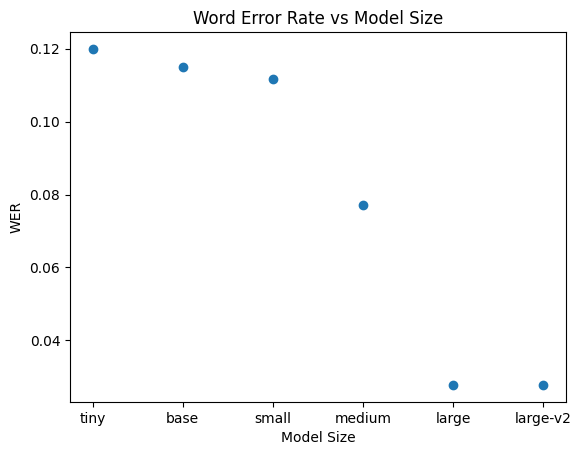

In [4]:
plt.plot(data["model_size"], data["wer"], "o")
plt.title("Word Error Rate vs Model Size")
plt.ylabel("WER")
plt.xlabel("Model Size")
# plt.ylim((0,1.1))

(0.0, 179.34182109832764)

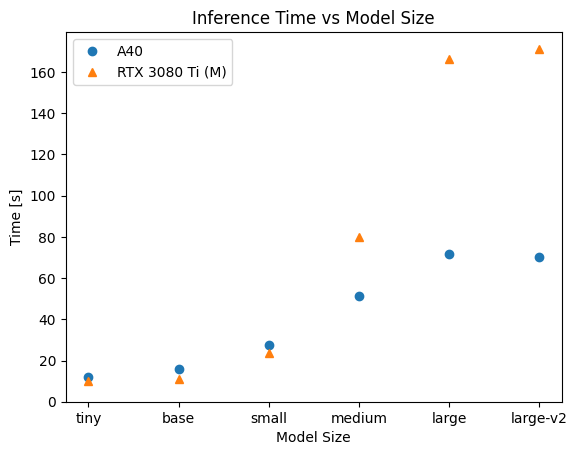

In [5]:
plt.plot(data["model_size"], data["time"], "o")
plt.plot(razer["model_size"], razer["time"], "^")
plt.title("Inference Time vs Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylabel("Time [s]")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

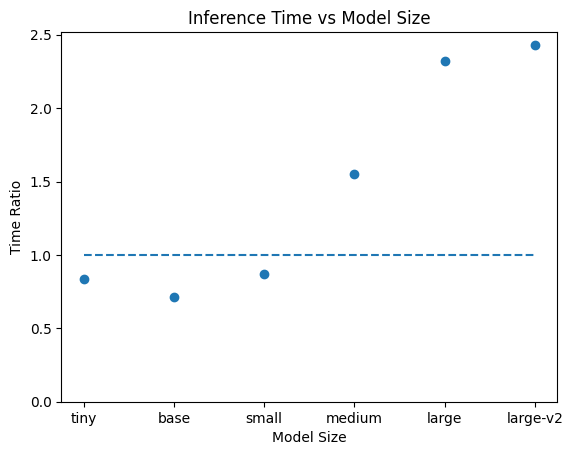

In [6]:
plt.plot(data["model_size"], razer["time"]/data["time"], "o")
plt.title("Time Ratio vs Model Size")
plt.ylabel("Time Ratio")
plt.xlabel("Model Size")
plt.ylim(bottom=0)
plt.hlines(1,0,5, linestyles="dashed")

(0.0, 11.7036013)

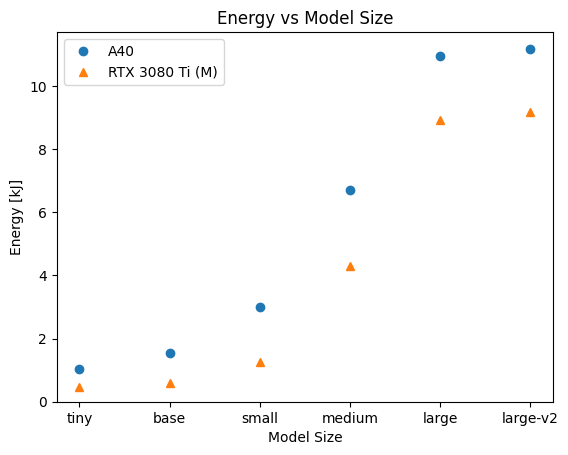

In [7]:
plt.plot(data["model_size"], data["energy"]/1_000_000, "o")
plt.plot(razer["model_size"], razer["energy"]/1_000_000, "^")
plt.title("Energy vs Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylabel("Energy [kJ]")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

(0.0, 2.6629698079139366)

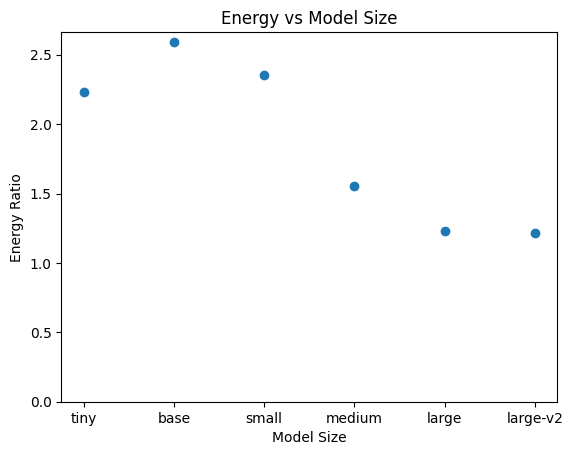

In [8]:
plt.plot(data["model_size"], data["energy"]/ razer["energy"], "o")
plt.title("Energy Ratio vs Model Size")
plt.ylabel("Energy Ratio")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

(0.0, 1652.3554120002946)

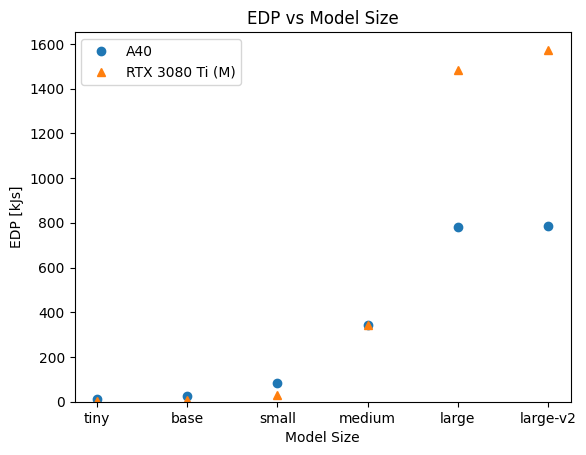

In [9]:
plt.plot(data["model_size"], data["energy"]/1_000_000*data["time"], "o")
plt.plot(razer["model_size"], razer["energy"]/1_000_000*razer["time"], "^")
plt.title("EDP vs Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylabel("EDP [kJs]")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

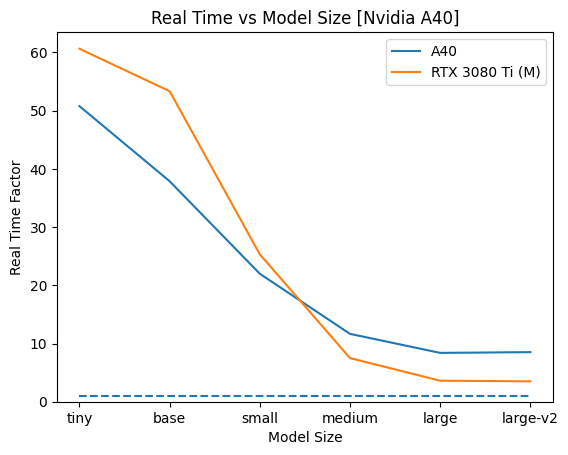

In [10]:
plt.plot(data["model_size"], 600/data["time"])
plt.plot(razer["model_size"], 600/razer["time"])
plt.title("Real Time vs Model Size [Nvidia A40]")
plt.ylabel("Real Time Factor")
plt.xlabel("Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylim(bottom=0)
plt.hlines(1,0,5, linestyles="dashed")

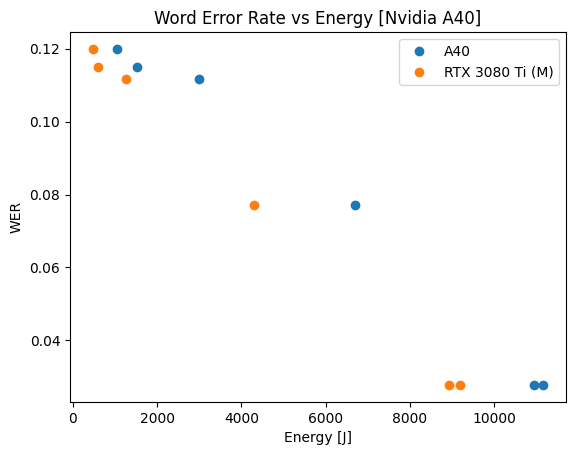

In [16]:
plt.plot( data["energy"]/1000, data["wer"], "o")
plt.plot( razer["energy"]/1000, data["wer"], "o")
plt.title("Word Error Rate vs Energy [Nvidia A40]")
plt.ylabel("WER")
plt.xlabel("Energy [J]")
#plt.ylim((0,1.1))
plt.legend(["A40", "RTX 3080 Ti (M)"])

Text(0.5, 0, 'Time [s]')

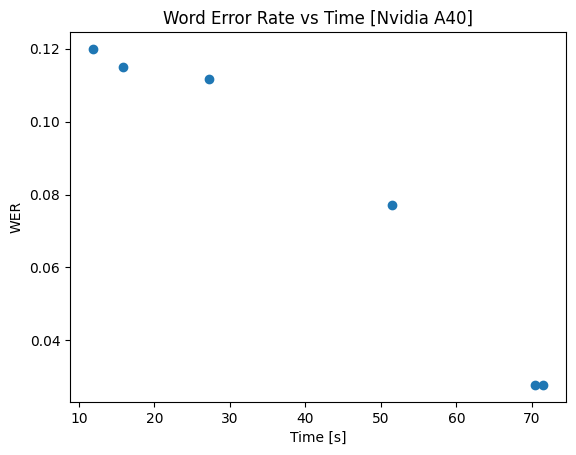

In [12]:
plt.plot(data["time"], data["wer"], "o")
plt.title("Word Error Rate vs Time [Nvidia A40]")
plt.ylabel("WER")
plt.xlabel("Time [s]")
#plt.ylim((0,1.1))

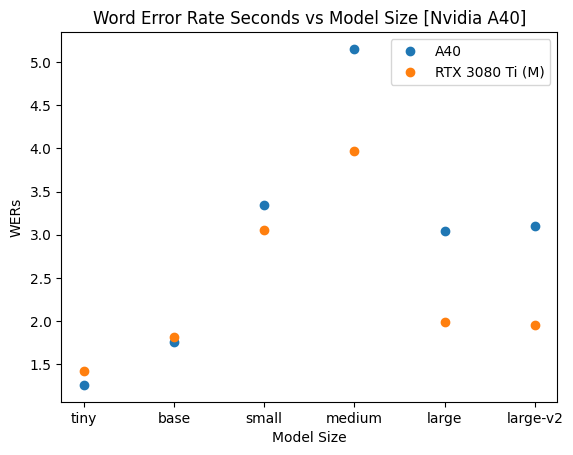

In [17]:
plt.plot(data["model_size"] ,data["wer"]*data["energy"]/100000, "o")
plt.plot(data["model_size"] ,data["wer"]*data["time"], "o")
plt.title("Word Error Rate Seconds vs Model Size [Nvidia A40]")
plt.ylabel("WERs")
plt.xlabel("Model Size")
# plt.ylim((0,1.1))
plt.legend(["A40", "RTX 3080 Ti (M)"])

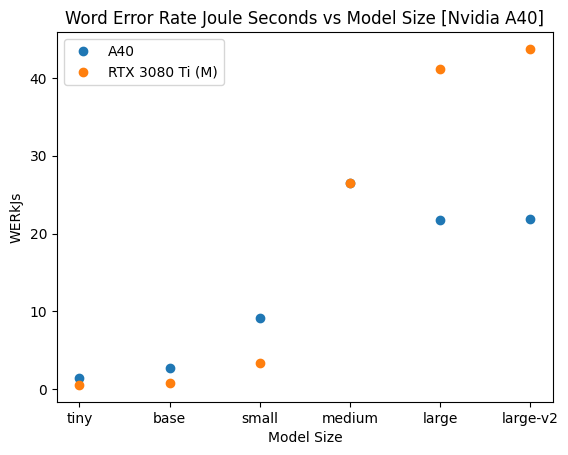

In [18]:
plt.plot(data["model_size"] ,data["wer"]*data["energy"]/1_000_000*data["time"], "o")
plt.plot(razer["model_size"] ,data["wer"]*razer["energy"]/1_000_000*razer["time"], "o")
plt.title("Word Error Rate Joule Seconds vs Model Size [Nvidia A40]")
plt.ylabel("WERkJs")
plt.xlabel("Model Size")
# plt.ylim((0,1.1))
plt.legend(["A40", "RTX 3080 Ti (M)"])